# Basic Data Science in Python - Project
## Leihui Li; leihui@mpe.au.dk ##

This handin is indiviual and mandatory to pass the course.

Hand in this .ipynb file, no later than 10/11 kl 23:59. 

### Project description
For this project, you have almost no limitations. You are going to be working with a [smoke detection dataset](https://www.hackster.io/stefanblattmann/real-time-smoke-detection-with-ai-based-sensor-fusion-1086e6), to classify a fire alarm. The dataset is located in the data folder, as $\texttt{smoke\_detection.csv} $.

Remember before you begin, to inspect the data - i.e does it need cleaning, what are you working with? Also, remember to seperate the dataset in two - the labels ("Fire Alarm"), and the rest of the data.

Concretely, you should use your knowledge of testing, overfitting, and the pros and cons of different models, to predict Fire Alarm (0 for no alarm, 1 for alarm) from the different air quality measures. Try at least two different methods. You must reason about your choice of methods, as well as evaluate your results. Can you visualize your results somehow?

In [6]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
csv_data = pd.read_csv('../data/smoke_detection.csv')
print (csv_data.head)
features, labels = csv_data.iloc[:, :-1].to_numpy(), csv_data.iloc[:,-1].to_numpy().reshape(-1,1)
print (features.shape, labels.shape)

<bound method NDFrame.head of        Unnamed: 0         UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  \
0               0  1654733331          20.000        57.36          0   
1               1  1654733332          20.015        56.67          0   
2               2  1654733333          20.029        55.96          0   
3               3  1654733334          20.044        55.28          0   
4               4  1654733335          20.059        54.69          0   
...           ...         ...             ...          ...        ...   
62625       62625  1655130047          18.438        15.79        625   
62626       62626  1655130048          18.653        15.87        612   
62627       62627  1655130049          18.867        15.84        627   
62628       62628  1655130050          19.083        16.04        638   
62629       62629  1655130051          19.299        16.52        643   

       eCO2[ppm]  Raw H2  Raw Ethanol  Pressure[hPa]  PM1.0  PM2.5  NC0.5  \
0            400

## 1. Decision Tree

The reason 

### 1.1 Implementation

In [8]:
# print (features.shape, labels.shape, type(features), type(labels))

from sklearn import tree
np.set_printoptions(precision=3, suppress=True)

X, y = features.copy(), labels.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print (f"Train data length:{X_train.shape}, Test data length:{X_test.shape}")
x_i = random.randint(0, len(X_test))
print (f"Here is an example: we select \"{x_i}\" th in Test data:")
print (f"feature:{X_train[x_i].tolist()} \nIts label is { y_train[x_i].tolist()}")

# Build decision tree and model
clf_model = tree.DecisionTreeClassifier(
    criterion='entropy', 
    splitter = 'random', 
    random_state=42, 
    max_depth=6,
    #min_impurity_decrease = 0.01,
    min_samples_leaf=1,
    min_samples_split=2)
clf_model = clf_model.fit(X_train, y_train)
# evalute by score
clf_score_sample, clf_score_test = clf_model.score(X_train,y_train), clf_model.score(X_test,y_test)     

print (f"The parameters of this decision tree are as follows:")
print (clf_model.get_params())

print (f"Training score: {clf_score_sample} test score: {clf_score_test}")

print (f"We select the {x_i} th among the test data:")
print (f"ground Truth:\n{X_test[x_i].tolist()} -> {y_test[x_i]}")
print (f"predict Result:\n{clf_model.predict(X_test[x_i].reshape(1, -1))}")

Train data length:(37578, 15), Test data length:(25052, 15)
Here is an example: we select "19552" th in Test data:
feature:[20852.0, 1654754183.0, 5.411, 47.92, 1396.0, 436.0, 12934.0, 19380.0, 938.708, 1.74, 1.81, 11.98, 1.868, 0.042, 20852.0] 
Its label is [1]
The parameters of this decision tree are as follows:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'random'}
Training score: 0.9948640161796796 test score: 0.995409548139869
We select the 19552 th among the test data:
ground Truth:
[1389.0, 1654734720.0, 26.438, 51.75, 30.0, 400.0, 13083.0, 19979.0, 939.701, 0.51, 0.53, 3.54, 0.552, 0.012, 1389.0] -> [0]
predict Result:
[0]


## 1.2 Visualization 

|--- feature_3 <= 46.32
|   |--- feature_8 <= 932.60
|   |   |--- feature_14 <= 137.53
|   |   |   |--- feature_2 <= 22.71
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  22.71
|   |   |   |   |--- feature_0 <= 50018.98
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  50018.98
|   |   |   |   |   |--- feature_9 <= 744.62
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_9 >  744.62
|   |   |   |   |   |   |--- class: 1
|   |   |--- feature_14 >  137.53
|   |   |   |--- class: 1
|   |--- feature_8 >  932.60
|   |   |--- feature_0 <= 34962.66
|   |   |   |--- feature_13 <= 0.04
|   |   |   |   |--- class: 0
|   |   |   |--- feature_13 >  0.04
|   |   |   |   |--- class: 1
|   |   |--- feature_0 >  34962.66
|   |   |   |--- feature_0 <= 53681.64
|   |   |   |   |--- feature_7 <= 20049.53
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_7 >  20049.53
|   |   |   |   |   |--- feature_6 <= 12840.73
|   |   |   |   |   |   |---

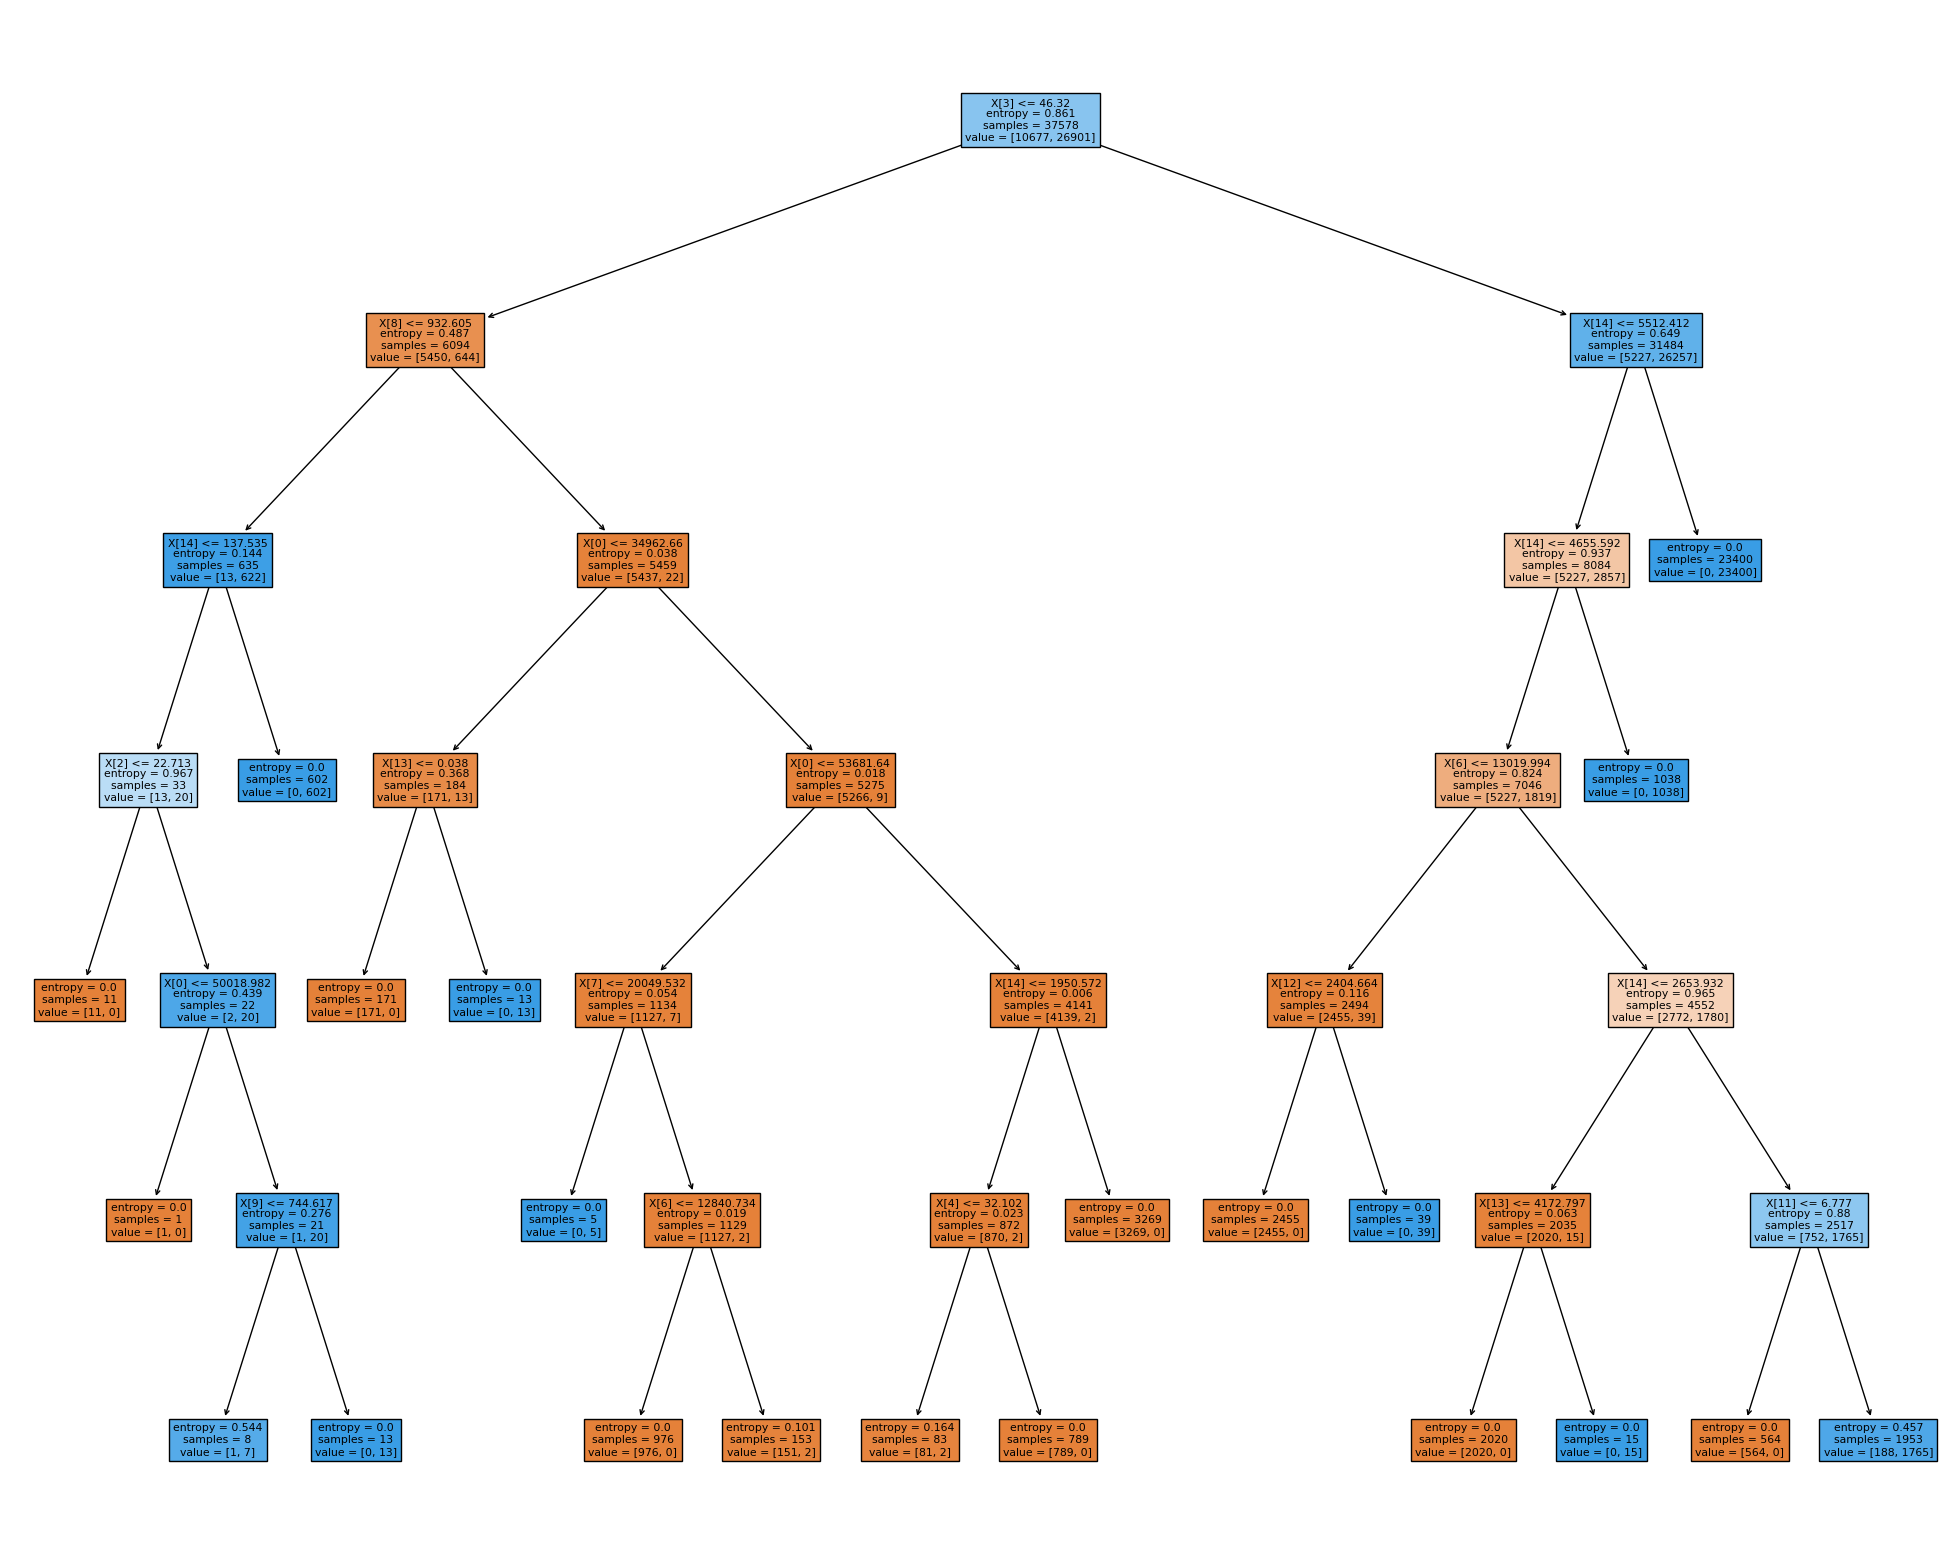

In [9]:
text_representation = tree.export_text(clf_model)
print(text_representation)

import sklearn
plt.figure(figsize=(25,20)) # Resize figure
sklearn.tree.plot_tree(clf_model, filled=True)
plt.show()

## 2. Neural Networks

## 2.1 Build the regression model using PyTorch

In [10]:
import torch, time
from tqdm.notebook import tqdm
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F

def run_epoch(model, optimizer, data_loader, loss_func, device, results, score_funcs, prefix="", desc=None):
    """
    model -- the PyTorch model / "Module" to run for one epoch
    optimizer -- the object that will update the weights of the network
    data_loader -- DataLoader object that returns tuples of (input, label) pairs.
    loss_func -- the loss function that takes in two arguments, the model outputs and the labels, and returns a score
    device -- the compute lodation to perform training
    score_funcs -- a dictionary of scoring functions to use to evalue the performance of the model
    prefix -- a string to pre-fix to any scores placed into the _results_ dictionary.
    desc -- a description to use for the progress bar.
    """
    running_loss = []
    y_true = []
    y_pred = []
    start = time.time()
    for inputs, labels in tqdm(data_loader, desc=desc, leave=False):
        #Move the batch to the device we are using.
        inputs = moveTo(inputs, device)
        labels = moveTo(labels, device)

        y_hat = model(inputs) #this just computed f_Θ(x(i))
        # Compute loss.
        loss = loss_func(y_hat, labels)

        if model.training:
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        #Now we are just grabbing some information we would like to have
        running_loss.append(loss.item())
        if score_funcs is not None:
            if len(score_funcs) > 0 and isinstance(labels, torch.Tensor):
                #moving labels & predictions back to CPU for computing / storing predictions
                labels = labels.detach().cpu().numpy()
                y_hat = y_hat.detach().cpu().numpy()
                #add to predictions so far
                y_true.extend(labels.tolist())
                y_pred.extend(y_hat.tolist())
    #end training epoch
    end = time.time()

    y_pred = np.asarray(y_pred)
    if len(y_pred.shape) == 2 and y_pred.shape[1] > 1: #We have a classification problem, convert to labels
        y_pred = np.argmax(y_pred, axis=1)
    #Else, we assume we are working on a regression problem

    results[prefix + " loss"].append( np.mean(running_loss) )
    if score_funcs is not None:
        for name, score_func in score_funcs.items():
            try:
                results[prefix + " " + name].append( score_func(y_true, y_pred) )
            except:
                results[prefix + " " + name].append(float("NaN"))
    return end-start #time spent on epoch

def train_simple_network(model, loss_func, train_loader, test_loader=None, score_funcs=None,
                         epochs=20, device="cpu", checkpoint_file=None):
    to_track = ["epoch", "total time", "train loss"]
    if test_loader is not None:
        to_track.append("test loss")
    if score_funcs is not None:
        for eval_score in score_funcs:
            to_track.append("train " + eval_score )
            if test_loader is not None:
                to_track.append("test " + eval_score )

    total_train_time = 0 #How long have we spent in the training loop?
    results = {}
    #Initialize every item with an empty list
    for item in to_track:
        results[item] = []

    #SGD is Stochastic Gradient Decent.
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
    #Place the model on the correct compute resource (CPU or GPU)
    model.to(device)
    for epoch in tqdm(range(epochs), desc="Epoch"):
        model = model.train()#Put our model in training mode

        total_train_time += run_epoch(model, optimizer, train_loader, loss_func, device, results, score_funcs, prefix="train", desc="Training")

        results["total time"].append( total_train_time )
        results["epoch"].append( epoch )

        if test_loader is not None:
            model = model.eval()
            with torch.no_grad():
                run_epoch(model, optimizer, test_loader, loss_func, device, results, score_funcs, prefix="test", desc="Testing")

    if checkpoint_file is not None:
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'results' : results
            }, checkpoint_file)

    return pd.DataFrame.from_dict(results)

class RegressionDataset(Dataset):
    def __init__(self, X, y):
        # super(Simple1DRegressionDataset, self).__init__()
        self.X = X.reshape(-1,15)
        self.y = y.reshape(-1,1)

    def __getitem__(self, index):
        return torch.tensor(self.X[index,:], dtype=torch.float32), torch.tensor(self.y[index], dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]
    
def moveTo(obj, device):
    """
    obj: the python object to move to a device, or to move its contents to a device
    device: the compute device to move objects to
    """
    if isinstance(obj, list):
        return [moveTo(x, device) for x in obj]
    elif isinstance(obj, tuple):
        return tuple(moveTo(list(obj), device))
    elif isinstance(obj, set):
        return set(moveTo(list(obj), device))
    elif isinstance(obj, dict):
        to_ret = dict()
        for key, value in obj.items():
            to_ret[moveTo(key, device)] = moveTo(value, device)
        return to_ret
    elif hasattr(obj, "to"):
        return obj.to(device)
    else:
        return obj

In [11]:
print (X.shape, y.shape)
test = RegressionDataset(X, y)
print (test[12])

(62630, 15) (62630, 1)
(tensor([1.2000e+01, 1.6547e+09, 2.0175e+01, 5.1620e+01, 0.0000e+00, 4.0000e+02,
        1.2467e+04, 1.9299e+04, 9.3976e+02, 8.1000e-01, 3.3800e+00, 0.0000e+00,
        3.9090e+00, 2.4880e+00, 1.2000e+01]), tensor([0.]))


In [12]:
## Dataset preparation
device = torch.device("cuda")
in_features = 15
out_features = 2
model = nn.Sequential(
    nn.Linear(in_features,  10),#hidden layer
    nn.Tanh(),#activation
    nn.Linear(10,  10),#hidden layer
    nn.Tanh(),#activation
    nn.Linear(10, out_features),#output layer
)
torch.manual_seed(42)
X, y = features.copy(), labels.copy()
tds = torch.utils.data.TensorDataset(torch.tensor(X, dtype=torch.float32).to(device), torch.tensor(y.flatten(), dtype=torch.long).to(device))
num_of_train_rows = int(X.shape[0]*0.6) # get sure to round up
num_of_test_rows = int(X.shape[0]*0.4)
train, test = torch.utils.data.random_split(tds, lengths=[num_of_train_rows, num_of_test_rows])

training_loader = DataLoader(train, shuffle=True,batch_size=64)
testing_loader = DataLoader(test, shuffle=True, batch_size=64)

In [9]:
## Training
device = torch.device("cuda")
loss_func = nn.CrossEntropyLoss()
results = train_simple_network(model, loss_func, training_loader, testing_loader, epochs=300, device=device, checkpoint_file='model.pt')

Epoch:   0%|          | 0/300 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

Training:   0%|          | 0/588 [00:00<?, ?it/s]

Testing:   0%|          | 0/392 [00:00<?, ?it/s]

     epoch  total time  train loss  test loss
0        0    1.743052    0.646950   0.608520
1        1    2.636880    0.601754   0.598662
2        2    3.534417    0.598302   0.597933
3        3    4.441031    0.598231   0.597711
4        4    5.353830    0.597678   0.597653
..     ...         ...         ...        ...
295    295  276.338670    0.598334   0.597982
296    296  277.245176    0.598070   0.597888
297    297  278.146646    0.598063   0.597892
298    298  279.068827    0.597802   0.597700
299    299  279.995031    0.597807   0.597794

[300 rows x 4 columns]


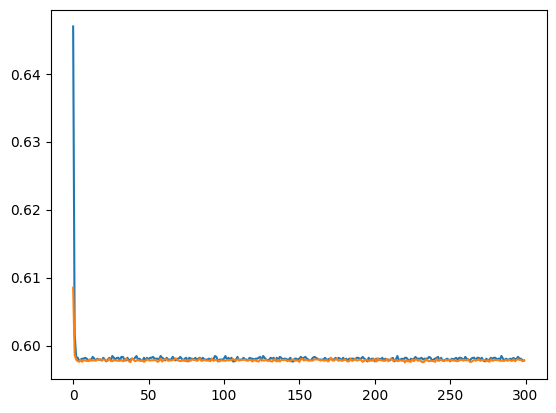

In [10]:
plt.plot(results['train loss'])
plt.plot(results['test loss'])
print (results)

In [30]:
from sklearn.metrics import confusion_matrix
print (test.dataset[21000])

checkpoint = torch.load('./model.pt')
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)

def pref(_x):
    with torch.no_grad():
        Y_logits = model(torch.tensor(_x.reshape(-1,15), device=device, dtype=torch.float32))
        y_hat = F.softmax(Y_logits)#Turn into probabilities 
        res = y_hat.cpu().numpy().flatten()
        print (res)
        return res#convert prediction to numpy array. 

user_x_0 = torch.from_numpy(np.array([957,1654734288,27.089,55.94,19,400,13010,19919,939.742,0.15,0.15,1.02,0.158,0.004,957])).to(device)
user_x_1 = torch.from_numpy(np.array([24499,1654757830,-1.144,48.22,1325,408,12986,19394,938.809,2.08,2.16,14.33,2.235,0.05,24499])).to(device)
pref(user_x_0)
pref(user_x_1)

# Y_pred = []
# with torch.no_grad():
#     for i, x in enumerate(X):
#         Y_logits = model(torch.tensor(x.reshape(-1,15), device=device, dtype=torch.float32))
#         y_hat = F.softmax(Y_logits, dim=1)#Turn into probabilities 
#         Y_pred.append(y_hat.cpu().numpy().flatten())#convert prediction to numpy array. 
#         print (f"data:\n{x.tolist()} -> {Y_pred[i].tolist()}")
        
# for i in Y_pred:
#     print(i)
# print("Confusion Matrix : ")
# y_pred = test.data.numpy()
# print (y_pred)
# confusion_matrix(y_pred.round().reshape(-1).detach(),y_test)

(tensor([2.1000e+04, 1.6548e+09, 3.0170e+00, 5.3890e+01, 1.3640e+03, 4.1600e+02,
        1.2940e+04, 1.9386e+04, 9.3871e+02, 2.1300e+00, 2.2100e+00, 1.4630e+01,
        2.2810e+00, 5.2000e-02, 2.1000e+04], device='cuda:0'), tensor(1, device='cuda:0'))
cuda
[0.285 0.715]
[0.285 0.715]


C:\Users\Leihui Li\AppData\Local\Temp\ipykernel_79304\3267954610.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_logits = model(torch.tensor(_x.reshape(-1,15), device=device, dtype=torch.float32))
C:\Users\Leihui Li\AppData\Local\Temp\ipykernel_79304\3267954610.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  y_hat = F.softmax(Y_logits)#Turn into probabilities


array([0.285, 0.715], dtype=float32)

##### Your thougths and reflections here